## Analysis of Reviews: Analyze whether the positive review percentage depends on the game being available free-of-cost? Visualize this distribution and identify trends

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data_file_path = "../data/final_0_80509.csv"

In [3]:
df = pd.read_csv(data_file_path,parse_dates=True, low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80510 entries, 0 to 80509
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   80510 non-null  int64  
 1   AppID                   80510 non-null  int64  
 2   Title                   78614 non-null  object 
 3   Initial_Price           73639 non-null  float64
 4   Final_Price             73639 non-null  float64
 5   Discount_Percent        73639 non-null  float64
 6   Developers              75707 non-null  object 
 7   Publishers              78618 non-null  object 
 8   Genres                  75622 non-null  object 
 9   Categories              75071 non-null  object 
 10  Required_Age            78618 non-null  object 
 11  Achievements            39397 non-null  float64
 12  Release_Date            78598 non-null  object 
 13  Metacritic_score        3888 non-null   float64
 14  DLC_Flag                78618 non-null

In [4]:
df.head(10)

Index    AppID                               Title  Initial_Price  \
0      0    20200                    Galactic Bowling            NaN   
1      1   655370                        Train Bandit           52.0   
2      2  1732930                        Jolt Project          199.0   
3      3  1355720                            Henosis™            NaN   
4      4  1139950               Two Weeks in Painland            0.0   
5      5  1469160                      Wartune Reborn            0.0   
6      6  1659180                           TD Worlds          530.0   
7      7  1968760  Legend of Rome - The Wrath of Mars          349.0   
8      8  1178150               MazM: Jekyll and Hyde          459.0   
9      9   320150           Deadlings: Rotten Edition          229.0   

   Final_Price  Discount_Percent                 Developers  \
0          NaN               NaN  ['Perpetual FX Creative']   
1         52.0               0.0           ['Rusty Moyher']   
2        199.0               0.0          ['Campião Games']   
3          NaN               NaN      ['Odd Critter Games']   
4          0.0               0.0          ['Unusual Games']   
5          0.0               0.0                  ['7Road']   
6        530.0               0.0          ['MAKSIM VOLKAU']   
7        349.0               0.0             ['magnussoft']   
8        459.0               0.0          ['Growing Seeds']   
9        229.0               0.0         ['ONE MORE LEVEL']   

                  Publishers  \
0  ['Perpetual FX Creative']   
1           ['Wild Rooster']   
2          ['Campião Games']   
3      ['Odd Critter Games']   
4          ['Unusual Games']   
5                  ['7Road']   
6          ['MAKSIM VOLKAU']   
7             ['magnussoft']   
8          ['CFK Co., Ltd.']   
9         ['ONE MORE LEVEL']   

                                              Genres  \
0                      ['Casual', 'Indie', 'Sports']   
1                                ['Action', 'Indie']   
2       ['Action', 'Adventure', 'Indie', 'Strategy']   
3                   ['Adventure', 'Casual', 'Indie']   
4                             ['Adventure', 'Indie']   
5  ['Adventure', 'Casual', 'Free to Play', 'Massi...   
6                              ['Indie', 'Strategy']   
7                                         ['Casual']   
8     ['Adventure', 'RPG', 'Simulation', 'Strategy']   
9                   ['Action', 'Adventure', 'Indie']   

                                          Categories  ...  \
0  ['Single-player', 'Multi-player', 'Steam Achie...  ...   
1  ['Single-player', 'Steam Achievements', 'Full ...  ...   
2                                  ['Single-player']  ...   
3       ['Single-player', 'Full controller support']  ...   
4            ['Single-player', 'Steam Achievements']  ...   
5  ['Single-player', 'Multi-player', 'MMO', 'PvP'...  ...   
6  ['Single-player', 'Steam Achievements', 'Steam...  ...   
7                   ['Single-player', 'Steam Cloud']  ...   
8  ['Single-player', 'Steam Achievements', 'Full ...  ...   
9  ['Single-player', 'Steam Achievements', 'Steam...  ...   

                                  Subtitle_Languages  Positive_Reviews  \
0                                        ['English']                 6   
1  ['English', 'French', 'Italian', 'German', 'Sp...                57   
2                                        ['English']               NaN   
3                                        ['English']                 5   
4                     ['English', 'Spanish - Spain']                53   
5                                        ['English']               133   
6                   ['English', 'Russian', 'Danish']                22   
7                              ['English', 'German']                 1   
8  ['English', 'French', 'Italian', 'German', 'Sp...                94   
9  ['English', 'Polish', 'French', 'Italian', 'Ge...               226   

  Negative_Reviews  Total_Reviews Overall_Review_Summary Re

In [5]:
# Taking required columns and getting summary

df = df[["AppID","Title","Metacritic_score","Final_Price","Positive_Reviews","Negative_Reviews"]]
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80510 entries, 0 to 80509
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             80510 non-null  int64  
 1   Title             78614 non-null  object 
 2   Initial_Price     73639 non-null  float64
 3   Final_Price       73639 non-null  float64
 4   Positive_Reviews  70727 non-null  object 
 5   Negative_Reviews  70727 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


AppID                               Title  Initial_Price  Final_Price  \
0    20200                    Galactic Bowling            NaN          NaN   
1   655370                        Train Bandit           52.0         52.0   
2  1732930                        Jolt Project          199.0        199.0   
3  1355720                            Henosis™            NaN          NaN   
4  1139950               Two Weeks in Painland            0.0          0.0   
5  1469160                      Wartune Reborn            0.0          0.0   
6  1659180                           TD Worlds          530.0        530.0   
7  1968760  Legend of Rome - The Wrath of Mars          349.0        349.0   
8  1178150               MazM: Jekyll and Hyde          459.0        459.0   
9   320150           Deadlings: Rotten Edition          229.0        229.0   

  Positive_Reviews Negative_Reviews  
0                6               11  
1               57                7  
2              NaN              NaN  
3                5                0  
4               53                6  
5              133               69  
6               22                9  
7                1                0  
8               94               10  
9              226               44

In [6]:
# Cleaning data removing NA values
df = df.dropna()
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 66110 entries, 1 to 80509
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             66110 non-null  int64  
 1   Title             66110 non-null  object 
 2   Initial_Price     66110 non-null  float64
 3   Final_Price       66110 non-null  float64
 4   Positive_Reviews  66110 non-null  object 
 5   Negative_Reviews  66110 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ MB


AppID                               Title  Initial_Price  Final_Price  \
1    655370                        Train Bandit           52.0         52.0   
4   1139950               Two Weeks in Painland            0.0          0.0   
5   1469160                      Wartune Reborn            0.0          0.0   
6   1659180                           TD Worlds          530.0        530.0   
7   1968760  Legend of Rome - The Wrath of Mars          349.0        349.0   
8   1178150               MazM: Jekyll and Hyde          459.0        459.0   
9    320150           Deadlings: Rotten Edition          229.0        229.0   
10  1026420       WARSAW RISING: City of Heroes            0.0          0.0   
11   485000                      Cthulhu Realms            0.0          0.0   
12  1620060                   Clockwork Dungeon           85.0         85.0   

   Positive_Reviews Negative_Reviews  
1                57                7  
4                53                6  
5               133               69  
6                22                9  
7                 1                0  
8                94               10  
9               226               44  
10              705              365  
11              148               60  
12                7                0

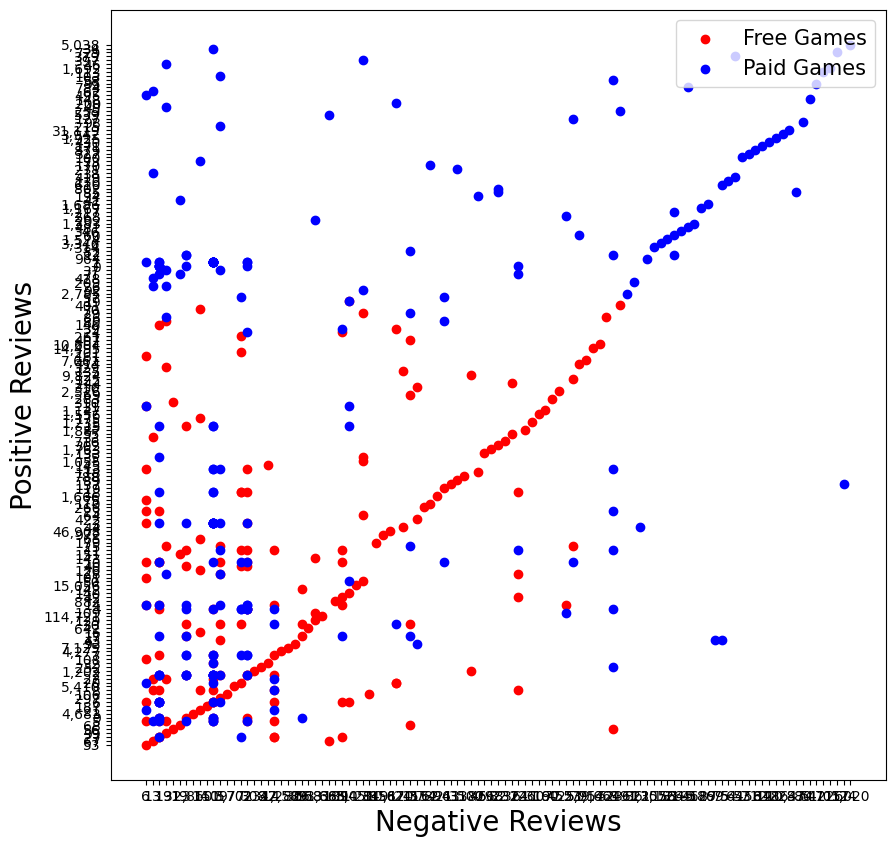

In [16]:
# Visualisation of trend

# skips values 
skip = None
free_games = df[(df["Final_Price"] == 0)| (df["Initial_Price"] == 0)][::50]
paid_games = df[~df["AppID"].isin(free_games["AppID"])][::300]

plt.figure(figsize= (10,10))
plt.scatter(free_games["Negative_Reviews"],free_games["Positive_Reviews"],color="red",label = "Free Games")
plt.scatter(paid_games["Negative_Reviews"],paid_games["Positive_Reviews"],color="blue",label = "Paid Games")

plt.legend(loc = 1, fontsize = 15)
plt.xlabel("Negative Reviews" , fontsize = 20)
plt.ylabel("Positive Reviews" , fontsize = 20)
plt.show()

### Inferences

1. From graph above we see  positive reviews are more than negative for most of games irrespective of their cost
2. The rough straight line diagonally shows (y = x) games for which negative and positive are almost same.
3. This plot also brings out a remarkable fact that paid games have more number of positive as well as more negative reviews (higher in magnitude) than free games as blue dots bubble up or bubble right
4. Paid games were reviewed more often than free ones.

Hence answer to the question is game wether free or not does not seem to affect % of positive reviews